## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Load the data into pandas dataframe**

In [2]:
boston = pd.read_csv("/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/2-Polynomial_Regression/ejercicios/data/Boston.csv", sep=",")
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

**Data preprocessing**

Check for missing values in all the columns

In [3]:
# TODO NUMEROS!! NICE
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
# FIJAOS EN LAS MEDIAS...
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

<Axes: xlabel='medv', ylabel='Count'>

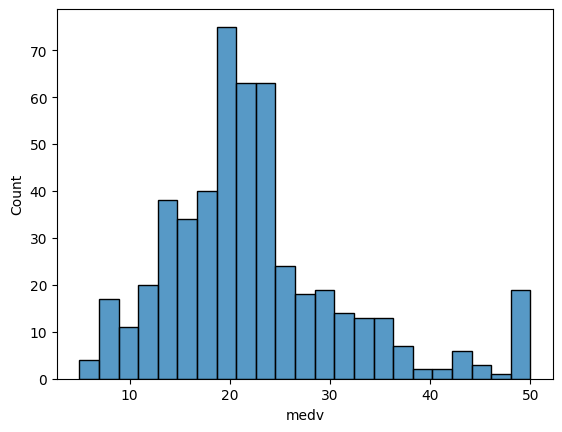

In [5]:
# DISTPLOT DE SEABORN DE LA VARIABLE MEDV
sns.histplot(x = boston['medv'])

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [6]:
# CORRELATION
boston.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<Axes: >

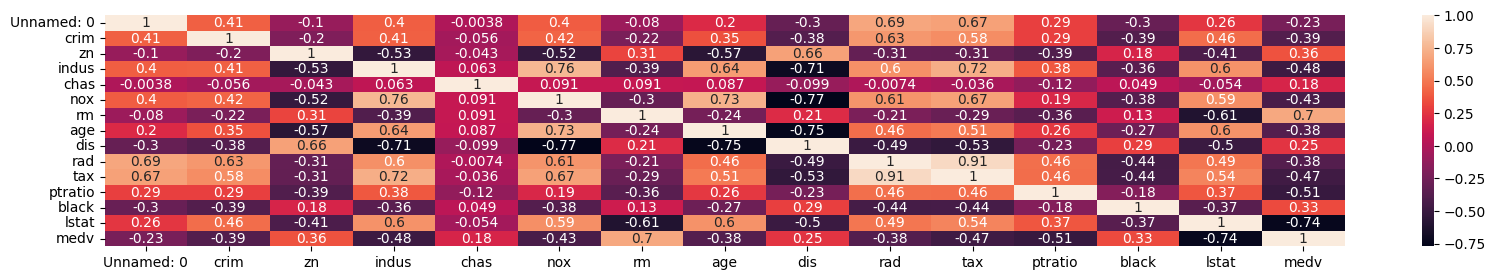

In [7]:
# HEATMAP BABY
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
sns.heatmap(boston.corr(),annot=True)

In [8]:
# NOS CARGAMOS LA COLUMNA TAX PORQUE HAY MUCHA CORRELACION ENTRE RAD Y TAX
tax = boston['tax'].pop
tax

<bound method Series.pop of 0      296
1      242
2      242
3      222
4      222
      ... 
501    273
502    273
503    273
504    273
505    273
Name: tax, Length: 506, dtype: int64>

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Axes: xlabel='lstat', ylabel='medv'>

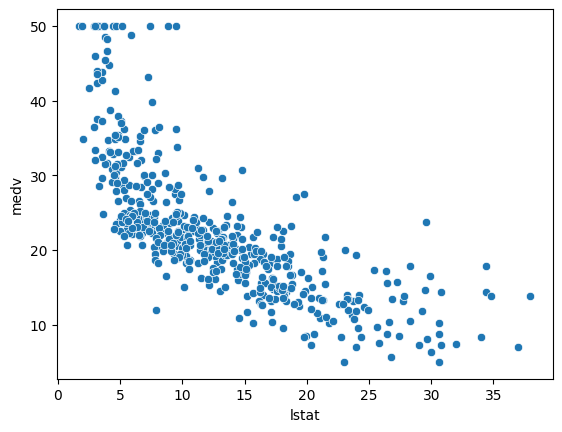

In [9]:
sns.scatterplot(x=boston['lstat'], y=boston['medv'])

<Axes: xlabel='rm', ylabel='medv'>

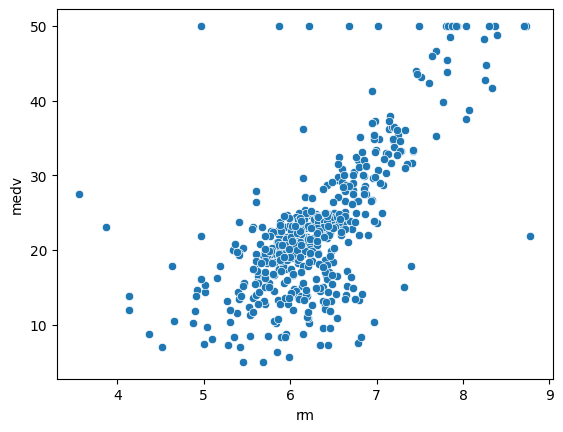

In [10]:
sns.scatterplot(x=boston['rm'], y=boston['medv'])

In [11]:
#

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [12]:
# LAS X TIENEN DOS COLUMNAS, LAS Y SON UNA SERIE
X = boston[['lstat', 'rm']]
y = boston['medv']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
# Miramos el shape de as particiones
X.shape


(506, 2)

# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [15]:
# INSTANCIA DEL MODELO Y FIT
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80)

## El Test hay que bajarlo dando una regulación

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

lin_reg = lr.predict(X_test)


**Evaluate the model performance in the training and testing sets**

In [16]:
# OS DEJO ESTO PERO NO OS ACOSTUMBREIS, REPASAD VUESTROS NOMBRES DE VARIABLES
# METRICAS DE TRAIN, OJO SOLO PARA VER UN POCO EL OVERFIT, PERO LAS IMPORTANTES SON LAS DE TEST
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, lr.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, lr.predict(X_train)))
print('MSE train', mean_squared_error(y_train, lr.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('R2 score train', r2_score(y_train, lr.predict(X_train)))

MAE train 4.522037188252464
MAPE train 0.25002444454201955
MSE train 35.50577040154613
RMSE train 5.958671865570895
R2 score train 0.6782406438645525


In [17]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, lr.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, lr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print('R2 score test', r2_score(y_test, lr.predict(X_test)))

MAE test 3.9057126256167427
MAPE test 0.20701034139170055
MSE test 30.086049003230386
RMSE test 5.485075113727285
R2 score test 0.6217972357937425


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

<Axes: xlabel='medv'>

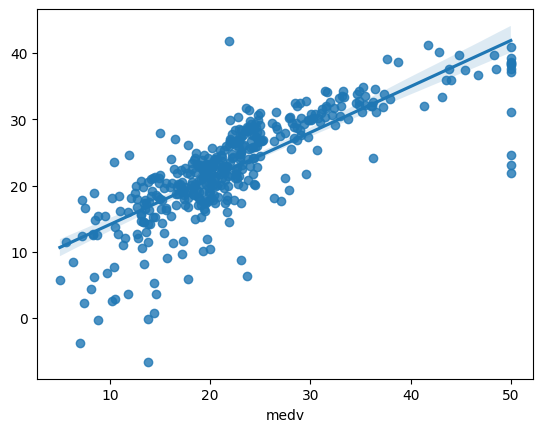

In [18]:
# ESTA OS LA DEJO POR QUE TODOS ODIAMOS ESTE PLOT
y_pred = lr.predict(X_test)
sns.regplot(x= y_test, y= y_pred)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [19]:
# FIT Y TRANSFORM DEL TRAIN CON POLYNOMIALFEATURES DE GRADO 2 Y ENTRENAMOS EL MODELO CON ESOS DATOS, LO LLAMAMOS pol_reg
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X) # Esto me ha elevado todas las X**2
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y)
score = pol_reg.score(X_poly, y)
score


0.7572658522486412

**Did the model improve using the Polynomial model?**

In [20]:
# Predicciones del modelo en los datos de entrenamiento
y_train_pred = pol_reg.predict(X_poly)

# Calcular métricas de evaluación
mae_train = mean_absolute_error(y, y_train_pred)
mape_train = np.mean(np.abs((y - y_train_pred) / y)) * 100
mse_train = mean_squared_error(y, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y, y_train_pred)

# Imprimir resultados
print('MAE train:', mae_train)
print('MAPE train:', mape_train)
print('MSE train:', mse_train)
print('RMSE train:', rmse_train)
print('R2 score train:', r2_train)

MAE train: 3.1245941294146284
MAPE train: 16.102005603262363
MSE train: 20.49150901711482
RMSE train: 4.526754799756092
R2 score train: 0.7572658522486412


In [21]:
# transformamos el test
X_poly_test = poly_feats.transform(X)


In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
lm = LinearRegression()


In [24]:
lm.fit(X_test, y_test)

LinearRegression()

In [25]:
predictions = lm.predict(X_test)


In [26]:
# Calcular métricas de evaluación en los datos de prueba
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)



In [27]:
# REPETIR CON POLINOMIO DE GRADO 3
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X) # Esto me ha elevado todas las X**2
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y)
score = pol_reg.score(X_poly, y)
score

0.7710626324710493

In [31]:
poly_reg_3 = PolynomialFeatures(degree=2)
poly_reg_3.fit(X_train)
X_poly_train = poly_reg_3.transform(X_train) 

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_poly_train, y_train)

print('MAE train', mean_absolute_error(y_train, pol_reg_3.predict(X_poly_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg_3.predict(X_poly_train)))
print('MSE train', mean_squared_error(y_train, pol_reg_3.predict(X_poly_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg_3.predict(X_poly_train))))
print('R2 score train', r2_score(y_train, pol_reg_3.predict(X_poly_train)))


print('-'*20)
X_poly_test = poly_reg_3.transform(X_test)

print('MAE test', mean_absolute_error(y_test, pol_reg_3.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg_3.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg_3.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg_3.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg_3.predict(X_poly_test)))

MAE train 2.9688953693195486
MAPE train 0.1711783397868675
MSE train 14.627761811603872
RMSE train 3.824625708694103
R2 score train 0.8674407238886613
--------------------
MAE test 3.390514202915668
MAPE test 0.16992318816057048
MSE test 23.963478299327935
RMSE test 4.895250585958592
R2 score test 0.6987622491796985


In [28]:
# REPETIR CON POLINOMIO DE GRADO 4
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X) # Esto me ha elevado todas las X**2
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y)
score = pol_reg.score(X_poly, y)
score

0.7923489155480508

COMO EL POLY REG 4 OVERFITEA (Y MUCHO!!!) SACAMOS LAS VISUALIZACIONES PARA LOS RESULTADOS DE GRADO 3

OS LAS DEJO:

In [40]:
X_all_polly = poly_reg_3.transform(X)

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

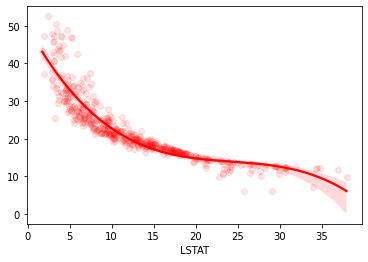

In [41]:

sns.regplot(X['LSTAT'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

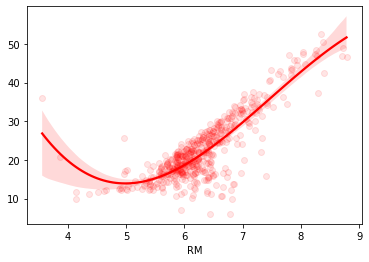

In [42]:

sns.regplot(X['RM'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})